<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/sprint_machine_learning_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 機械学習スクラッチ入門

# 【問題1】train_test_splitのスクラッチ

### 第4週で作成したテストデータ（住宅情報：特徴量を選別）を使用。DataFrame型変数に格納、null値削除まで実施。

In [ ]:
import pandas as pd

DATA_DIR='C:/Users/es/Documents/Python Scripts/Week4/'
data = pd.read_csv(f'{DATA_DIR}train.csv')

X = data.loc[:,['GrLivArea','YearBuilt']]
y = data.loc[:,['SalePrice']]

X.isnull().sum()
y.isnull().sum()

SalePrice    0
dtype: int64

### scratch_train_test_splitの定義

In [ ]:
# DataFrame型を分割し、np.array型を返す。
def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証データを分割する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定
    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く
    X_IDX = np.arange(len(X))
    np.random.shuffle(X_IDX)

    X_train = np.array([])
    y_train = np.array([])
    X_test = np.array([])
    y_test = np.array([])

    for i in range(len(X)):
      if i < len(X)*train_size:
        X_train = np.append(X_train, X.iloc[X_IDX[i],:])
        y_train =  np.append(y_train, y.iloc[X_IDX[i],:])
      elif i < len(X):
        X_test =  np.append(X_test, X.iloc[X_IDX[i],:])
        y_test =  np.append(y_test, y.iloc[X_IDX[i],:])    
    pass
    return X_train, X_test, y_train, y_test

In [ ]:
# np.array型の配列を分割し、np.array型を返す。
import numpy as np
def scratch_train_test_split_np(X, y, train_size=0.8,):
    """
    検証データを分割する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定
    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く
    X_IDX = np.arange(len(X))
    np.random.shuffle(X_IDX)

    X_train = np.array([])
    X_test = np.array([])
    y_train = np.array([])
    y_test = np.array([])

    for i in range(len(X)):
      if i < len(X)*train_size:
        X_train = np.append(X_train, X[X_IDX[i]])
        y_train = np.append(y_train, y[X_IDX[i]])
      elif i < len(X):
        X_test = np.append(X_test, X[X_IDX[i]])
        y_test = np.append(y_test, y[X_IDX[i]])
    pass
    return X_train, X_test, y_train, y_test

### scratch_train_test_splitの実行

In [ ]:
X0_train, X0_test, y0_train, y0_test = scratch_train_test_split(X, y, train_size = 0.85)
X0_train = X0_train.reshape(int((len(X0_train)+1)/2),2)
X0_test = X0_test.reshape(int((len(X0_test)+1)/2),2)

### 上記分割の実施後、線形回帰分析を実施

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
reg = lm.fit(X0_train, y0_train)
print("線形回帰のスコア={}".format(reg.score(X0_train, y0_train)))
      
print("線形回帰の傾き={}".format(reg.coef_))
print("線形回帰の切片={}".format(reg.intercept_))
y_pred = reg.predict(X0_test)
mse = mean_squared_error(y0_test, y_pred, squared = True)
print("線形回帰のRMSE={}".format(round(np.sqrt(mse))))

線形回帰のスコア=0.6478946438311379
線形回帰の傾き=[  93.99555017 1050.99764541]
線形回帰の切片=-2033794.170330485
線形回帰のRMSE=43393


# 【問題2】 分類問題を解くコードの作成

### 3種類のデータセットを作成する。

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
import pandas as pd
X1 = pd.DataFrame(data = data.data[50:150,:],columns=data.feature_names)

In [ ]:
y1 = pd.DataFrame(data=data.target[50:150],columns=['spacies'])

In [ ]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X2 = np.concatenate((f0, f1))
y2 = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X2 = X2[random_index]
y2 = y2[random_index]

In [ ]:
X3 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 3種類のデータセットをそれぞれ散布図で描画する。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_scatter(X, y):
    X=np.array(X)
    y=np.array(y)
    fig = plt.figure()
    plt.figure(figsize=(8, 7))
    plt.title("make_classification : n_features=2  n_classes=2")
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

<Figure size 432x288 with 0 Axes>

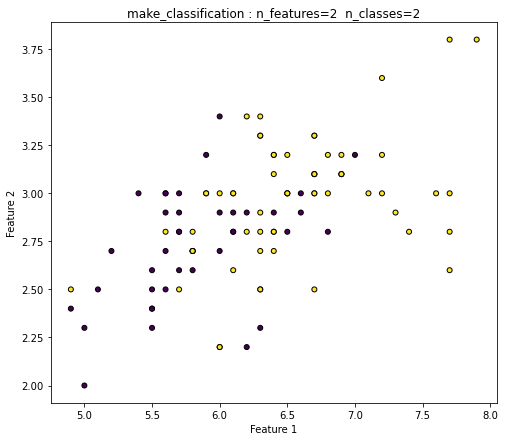

In [ ]:
plot_scatter(X1,y1)

<Figure size 432x288 with 0 Axes>

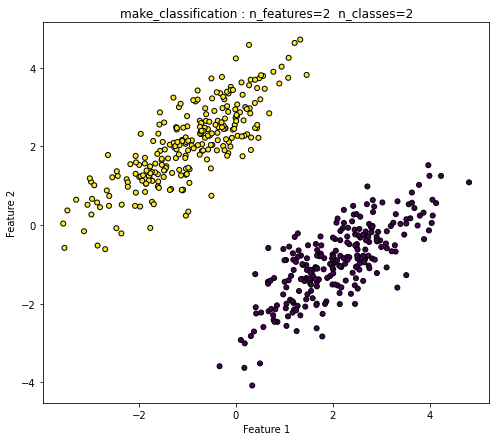

In [ ]:
plot_scatter(X2,y2)

<Figure size 432x288 with 0 Axes>

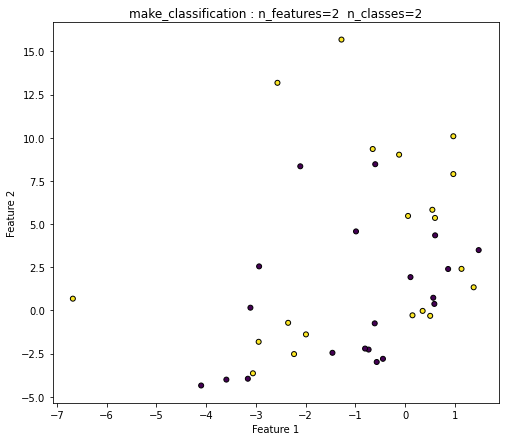

In [ ]:
plot_scatter(X3,y3)

### scratch_train_test_splitの実行

In [ ]:
X1_train, X1_test, y1_train, y1_test = scratch_train_test_split(X1, y1, train_size = 0.85)
X2_train, X2_test, y2_train, y2_test = scratch_train_test_split_np(X2, y2, train_size = 0.85)
X3_train, X3_test, y3_train, y3_test = scratch_train_test_split_np(X3, y3, train_size = 0.85)

In [ ]:
X1_train = X1_train.reshape(int((len(X1_train)+1)/4),4)
X1_test = X1_test.reshape(int((len(X1_test)+1)/4),4)
X2_train = X2_train.reshape(int((len(X2_train)+1)/2),2)
X2_test = X2_test.reshape(int((len(X2_test)+1)/2),2)
X3_train = X3_train.reshape(int((len(X3_train)+1)/2),2)
X3_test = X3_test.reshape(int((len(X3_test)+1)/2),2)

### SDC分類で学習、推定する。

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

In [ ]:
clf.fit(np.array(X1_train),np.array(y1_train).reshape(len(y1_train),))
y_pred = clf.predict(X1_test)

In [ ]:
clf.fit(X2_train, y2_train)
y_pred = clf.predict(X2_test)

In [ ]:
clf.fit(np.array(X3_train),np.array(y3_train).reshape(len(y3_train),))
y_pred = clf.predict(X3_test)

### SVCで学習、推定する。

In [ ]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(np.array(X1_train),np.array(y1_train).reshape(len(y1_train),))
y_pred = clf.predict(X1_test)

In [ ]:
clf.fit(np.array(X2_train),np.array(y2_train).reshape(len(y2_train),))
y_pred = clf.predict(X2_test)

In [ ]:
clf.fit(np.array(X3_train),np.array(y3_train).reshape(len(y3_train),))
y_pred = clf.predict(X3_test)

### 決定木で学習、推定する。

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X1_train, y1_train)
y_pred = clf.predict(X1_test)

In [ ]:
clf = clf.fit(X2_train, y2_train)
y_pred = clf.predict(X2_test)

In [ ]:
clf = clf.fit(X3_train, y3_train)
y_pred = clf.predict(X3_test)

# 【問題3】 回帰問題を解くコードの作成

### SDC回帰で学習、推定する。

In [ ]:
from sklearn.linear_model import SGDRegressor
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X0_train, y0_train)
y_pred = reg.predict(X0_test)